In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
data = pd.read_csv('files/new_categ_dropped.csv')
data

,text,category
0,Повторная отправка Рецензия Гаршиной.doc Добры...,рецензирование
1,Re: Шаблон рецензии (новый) Спасибо.Нечаев.,другое
2,RE: статья Вестник САИТ Рецензия Рецензия Толс...,рецензирование
3,RE: статья для рецензирования рецензия_на_Проб...,рецензирование
4,RE: рецензия на статью Рецензия Толстоброва на...,рецензирование
...,...,...
820,Re: статья на рецензию Рецензии Сагдатуллина А...,рецензирование
821,"статья Рис1.docx,Рис2.docx,Статья .doc Здравст...",вопросы
822,Re: Королев= ответы на замечания рецензента От...,рецензирование
823,"Re: Конденсированные среды Добрый день, Викто...",другое


In [4]:
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

In [32]:
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [33]:
# vectorizer = TfidfVectorizer()
# X_vectorized = vectorizer.fit_transform(X)

In [34]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'ясен', 'ясно', 'яшина'], dtype=object)

In [35]:
X_vectorized

<825x11817 sparse matrix of type '<class 'numpy.int64'>'
	with 71866 stored elements in Compressed Sparse Row format>

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

## Наивный Байес

In [37]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [38]:
predictions = nb_classifier.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, predictions)
print("Точность модели: {:.2f}".format(accuracy))

Точность модели: 0.65


In [40]:
input_text = "здравствуйте редакция журнала «вестник вгу» прошу разместить статью в вашем журнале с уважением алдабаева "

# Преобразование входного текста в матрицу частот слов с использованием того же объекта vectorizer
input_text_vectorized = vectorizer.transform([input_text])

# Предсказание категории для вводного текста
predicted_category = nb_classifier.predict(input_text_vectorized)

print("Предсказанная категория:", predicted_category[0])

Предсказанная категория: подача статьи


In [41]:
nb_classifier.classes_

array(['вопросы', 'готово к публикации', 'доработка', 'другое',
       'отклонена', 'подача статьи', 'проверка статьи', 'рецензирование'],
      dtype='<U19')

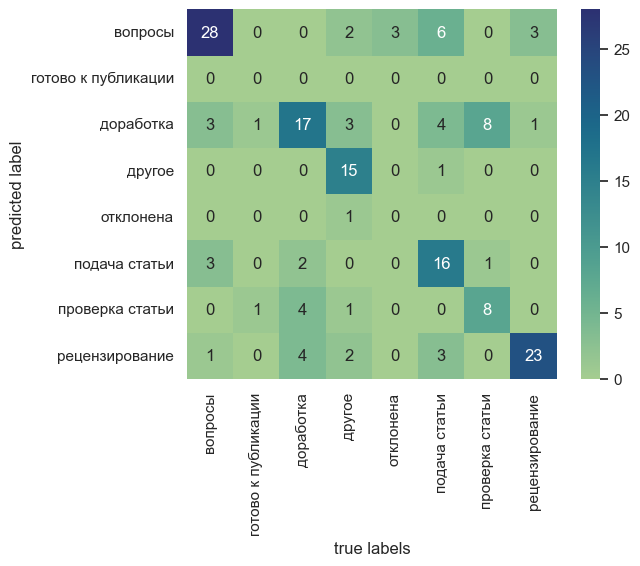

Accuracy: 0.6484848484848484


In [42]:
class_labels = nb_classifier.classes_
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=np.unique(y),yticklabels=np.unique(y), cmap="crest")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("Accuracy: {}".format(accuracy_score(y_test, predictions)))

## KNN

In [43]:
le = preprocessing.LabelEncoder()
label=le.fit_transform(y)

In [44]:
# Applying k = 3, default Minkowski distance metrics
model = KNeighborsClassifier(n_neighbors=3)
# Training the classifier
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
y_pred = model.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели: {:.2f}".format(accuracy))

Точность модели: 0.49


### SVM

In [47]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [48]:
y_pred = svm.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели: {:.2f}".format(accuracy))

Точность модели: 0.67


In [50]:
unique_labels = np.unique(y)
unique_labels

array(['вопросы', 'готово к публикации', 'доработка', 'другое',
       'отклонена', 'подача статьи', 'проверка статьи', 'рецензирование'],
      dtype=object)

## Деревья решений

In [51]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [52]:
y_pred = clf.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели: {:.2f}".format(accuracy))

Точность модели: 0.58


In [54]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("dec_tree") 

'dec_tree.pdf'

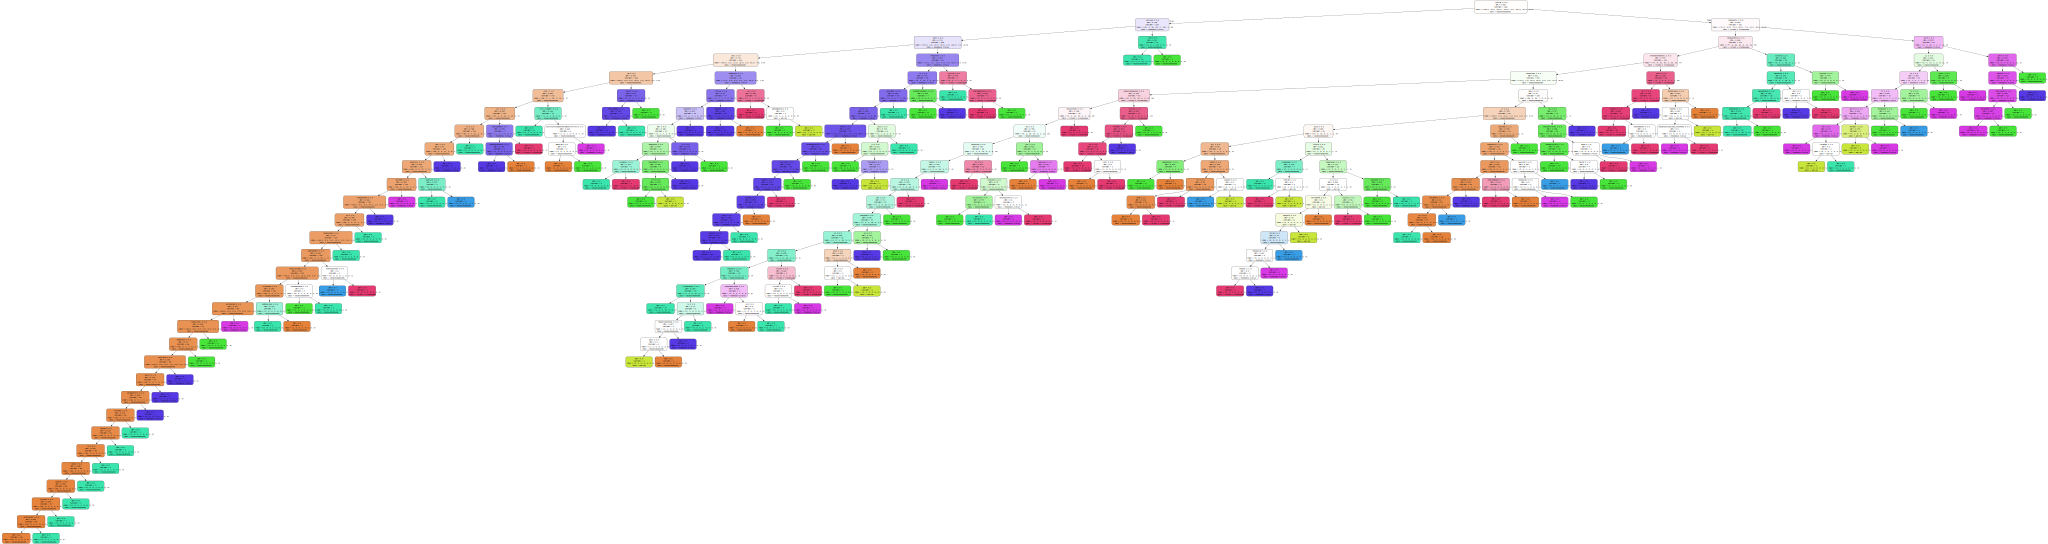

In [55]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=vectorizer.get_feature_names_out(),  
                      class_names=y,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Логистическая регрессия

In [56]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

F:\Projects\Python\techAI\MailManagementApp\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели: {:.2f}".format(accuracy))

Точность модели: 0.68
